In [20]:
import pandas as pd
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

from eda_helpers import extract_dict, extract_nested_dict #documentation in eda_helpers.py

In [2]:
## load scraped data
data = pickle.load(open("../data/hotel_info_final2.pkl", "rb"))
data = data.rename(columns={'url': 'link'})
print(data.shape)
data.head()

(307, 20)


,hotel_name_,stars,location,review_rating,description,main_facilities,total_reviews,sub_ratings,sub_ratings_categories,sub_ratings_dict,hotel_surroundings,hotel_surroundings_distance,surroundings_dict,room_type,price_list,cheapest_price,facilities_groups,all_facilities,link,room_price_dict
0,RedDoorz near East Avenue Medical Center,2,"90 Matatag Street, Quezon City, 1100 Manila, P...",6.0,RedDoorz near East Avenue Medical Center featu...,"[Non Smoking Rooms, Free WiFi Internet Access ...",88,"[6.9, 6.3, 6.5, 6.5, 7.0, 7.8, 6.3]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '6.9', 'Facilities': '6.3', 'Cleanli...","[Quezon City Hall Park and Lagoon, Children's ...","[900 m, 900 m, 1.1 km, 1.3 km, 1.6 km, 1.6 km,...","{'Quezon City Hall Park and Lagoon': '900 m', ...","[Deluxe Room, Economy Double Room, Economy Dou...","[977.0, 1413.0, 1944.0, 1954.0, 2150.0, 1590.0...",977.0,"[Bathroom, Bedroom, Media & Technology, Parkin...","[[Toilet paper, Towels, Towels/Sheets (extra f...",https://www.booking.com/hotel/ph/reddoorz-near...,"{'Single Room': 1238.0, 'Executive Suite': 185..."
1,Skylab Guesthouse,2,"213B, Aldrin Street, Moonwalk Village 1, Parañ...",8.0,You're eligible for a Genius discount at Skyla...,"[Non Smoking Rooms, Spa & Wellness Centre, Fre...",79,"[8.8, 7.8, 8.3, 8.4, 8.4, 8.1, 7.5]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.8', 'Facilities': '7.8', 'Cleanli...","[Barcelona Park, Guadalajara Park, Continental...","[950 m, 1.3 km, 1.5 km, 1.6 km, 1.7 km, 1.7 km...","{'Barcelona Park': '950 m', 'Guadalajara Park'...","[Double Room, Queen Room, Double Room with Sha...","[1709.0, 1709.0, 1709.0]",1709.0,"[Bathroom, Bedroom, View, Outdoors, Kitchen, R...","[[Toilet paper, Towels, Additional bathroom, B...",https://www.booking.com/hotel/ph/skylab213b.ht...,"{'Double Room with Shared Bathroom': 1709.0, '..."
2,The Excelsior Hotel Las Piñas,4,"1345 Alabang–Zapote Road, Las Pinas, 1750 Mani...",7.3,"Located in Manila, 12.2 km from Mall of Asia A...","[Swimming pool, Airport Shuttle, Non Smoking R...",6,"[7.9, 8.3, 7.9, 8.8, 7.9, 7.9, 7.9]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.9', 'Facilities': '8.3', 'Cleanli...","[Philamlife Village Park, Jasmin Circle open-c...","[550 m, 1,000 m, 1 km, 1 km, 1.2 km, 1.4 km, 1...","{'Philamlife Village Park': '550 m', 'Jasmin C...","[Deluxe Room, Deluxe Room, Executive Room, Exe...","[3010.0, 3571.0, 3724.0, 4357.0, 4499.0, 5077....",3010.0,"[Bathroom, Bedroom, View, Outdoors, Room Ameni...","[[Toilet paper, Towels, Bidet, Guest bathroom,...",https://www.booking.com/hotel/ph/the-excelsior...,"{'One Bedroom Suite ': 4788.0, 'Executive Prem..."
3,Rothman Hotel,3,"1633 M. Adriatico St., Malate, 1004 Manila, Ph...",7.8,Rothman Hotel is located in the district of Ma...,"[Non Smoking Rooms, Room-service, Free Parking...",45,"[8.3, 7.6, 8.0, 7.8, 7.8, 8.7, 8.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '8.3', 'Facilities': '7.6', 'Cleanli...","[Pedro Gil Park, Manila Baywalk, Remedios Circ...","[250 m, 450 m, 450 m, 500 m, 750 m, 950 m, 1,0...","{'Pedro Gil Park': '250 m', 'Manila Baywalk': ...","[Renovated King Room, Deluxe Double Room, Delu...","[2160.0, 2545.0, 3223.0, 2545.0, 3223.0]",2160.0,"[Bathroom, Kitchen, Living Area, Media & Techn...","[[Private Bathroom, Toilet, Free toiletries, S...",https://www.booking.com/hotel/ph/rothman-manil...,"{'Deluxe Twin Room': 2545.0, 'Deluxe Double Ro..."
4,OYO 772 Remedios Apartment,3,"909, Remedios St, Manila Malate Manila, 1004 M...",6.8,You're eligible for a Genius discount at OYO 7...,"[Non Smoking Rooms, Free WiFi Internet Access ...",113,"[7.5, 6.5, 6.9, 6.9, 7.0, 7.7, 8.8]","[Staff, Facilities, Cleanliness, Comfort, Valu...","{'Staff': '7.5', 'Facilities': '6.5', 'Cleanli...","[Remedios Circle, MMDA Children's Road Safety ...","[600 m, 850 m, 950 m, 950 m, 950 m, 1,000 m, 1...","{'Remedios Circle': '600 m', 'MMDA Children's ...","[Deluxe Double Room, Deluxe 

In [3]:
data['review_rating'] = data['review_rating'].astype('float')
data['total_reviews'] = data['total_reviews'].replace(r',','', regex=True) 
data['total_reviews'] = data['total_reviews'].astype('int')

In [4]:
price_data = data[['hotel_name_', 'review_rating', 'stars', 'room_price_dict']]
price_data

,hotel_name_,review_rating,stars,room_price_dict
0,RedDoorz near East Avenue Medical Center,6.0,2,"{'Single Room': 1238.0, 'Executive Suite': 185..."
1,Skylab Guesthouse,8.0,2,"{'Double Room with Shared Bathroom': 1709.0, '..."
2,The Excelsior Hotel Las Piñas,7.3,4,"{'One Bedroom Suite ': 4788.0, 'Executive Prem..."
3,Rothman Hotel,7.8,3,"{'Deluxe Twin Room': 2545.0, 'Deluxe Double Ro..."
4,OYO 772 Remedios Apartment,6.8,3,"{'Standard Double Room': 1125.0, 'Deluxe Doubl..."
...,...,...,...,...
302,RedDoorz at EDSA Pasay,6.9,2,"{'Single Room': 1176.0, 'Family Room': 1637.0,..."
303,Kabayan Hotel Pasay,6.8,3,"{'Pad Premium': 1286.0, 'Team Room': 3781.0, '..."
304,"Crimson Hotel Filinvest City, Manila",8.1,5,"{'Premier Single Room(s)': 15725.0, 'One Bedro..."
305,RedDoorz @ Jardin LRT Tayuman Manila,7.3,2,"{'Family Room': 2249.0, 'Deluxe Room': 1501.0,..."


In [5]:
price_data_long = extract_dict(price_data, 'room_price_dict')
price_data_long

,category,value,hotel_name_
0,Single Room,1238.0,RedDoorz near East Avenue Medical Center
1,Executive Suite,1855.0,RedDoorz near East Avenue Medical Center
2,Family Room,2308.0,RedDoorz near East Avenue Medical Center
3,Triple Room,1590.0,RedDoorz near East Avenue Medical Center
4,Economy Double Room,1413.0,RedDoorz near East Avenue Medical Center
...,...,...,...
2,Double Room,708.0,RedDoorz @ Jardin LRT Tayuman Manila
0,Deluxe Twin Room,2912.0,88 Courtyard Hotel
1,Deluxe Double Room,2651.0,88 Courtyard Hotel
2,Superior Twin Room,2505.0,88 Courtyard Hotel


In [6]:
price_data_long[price_data_long['hotel_name_'] == 'Sofitel Philippine Plaza Manila']

,category,value,hotel_name_
0,Imperial King Suite,178300.0,Sofitel Philippine Plaza Manila
1,Opera Suite,44150.0,Sofitel Philippine Plaza Manila
2,Sofitel King Suite with City View or Bay View,18000.0,Sofitel Philippine Plaza Manila
3,Junior Family King Suite with City View or Bay...,17000.0,Sofitel Philippine Plaza Manila
4,Luxury Club King Room with Pool View,15600.0,Sofitel Philippine Plaza Manila
5,Luxury Club King Room with Bay View,14700.0,Sofitel Philippine Plaza Manila
6,Luxury Club Twin Room with City View,13700.0,Sofitel Philippine Plaza Manila
7,Luxury Club King Room with City View,13700.0,Sofitel Philippine Plaza Manila
8,Superior King Room with City View,7200.0,Sofitel Philippine Plaza Manila


In [7]:
mean_price = price_data_long.groupby('hotel_name_')['value'].mean().reset_index()
mean_price = mean_price.merge(data[['hotel_name_', 'stars', 'review_rating', 'total_reviews']])
mean_price

,hotel_name_,value,stars,review_rating,total_reviews
0,88 Courtyard Hotel,2431.250000,3,7.5,173
1,ACL Suites,3863.000000,2,6.0,13
2,Achievers Airport Hotel,3200.000000,2,7.4,709
3,Admiral Hotel Manila - MGallery,11518.888889,5,9.1,20
4,Airo Hotel Manila,2328.750000,3,7.6,201
...,...,...,...,...,...
302,airobedz MAKATI - near Cash & Carry Mall,1619.000000,3,8.5,691
303,airobedz MANILA - near Taft Avenue,963.000000,2,8.0,223
304,airobedz MCKINLEY - near SM Aura,1290.000000,2,8.5,372
305,iHotel Uptown BGC,2181.200000,3,8.1,401


In [8]:
mean_price.sort_values('value', ascending=False)

,hotel_name_,value,stars,review_rating,total_reviews
258,Sofitel Philippine Plaza Manila,35816.666667,5,8.1,2021
259,Solaire Resort & Casino - Staycation Approved,22664.000000,5,8.7,117
255,Sheraton Manila Hotel,20160.000000,5,8.4,119
253,"Shangri-La The Fort, Manila",19725.000000,5,9.1,509
113,Manila Marriott Hotel,18351.777778,5,8.5,136
...,...,...,...,...,...
157,OYO 842 City Smiles Apartelle,760.000000,3,7.2,69
160,OYO 854 Busline Apartelle,742.000000,2,6.4,54
197,RedDoorz @ Kassel North Caloocan,718.000000,2,6.0,10
243,RedDoorz near Quiapo Church Manila,715.000000,2,6.5,88


In [9]:
mean_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hotel_name_    307 non-null    object 
 1   value          307 non-null    float64
 2   stars          307 non-null    int64  
 3   review_rating  307 non-null    float64
 4   total_reviews  307 non-null    int32  
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 13.2+ KB


[Text(0.5, 1.0, 'distribution of room price by star rating \n(average room price)')]

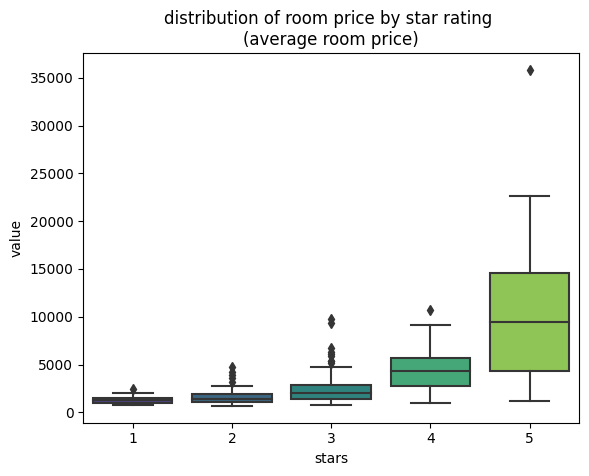

In [10]:
ax = sns.boxplot(data = mean_price, x = 'stars', y = 'value', palette='viridis')
ax.set(title = 'distribution of room price by star rating \n(average room price)')

[Text(0.5, 1.0, 'number of reviews by star rating')]

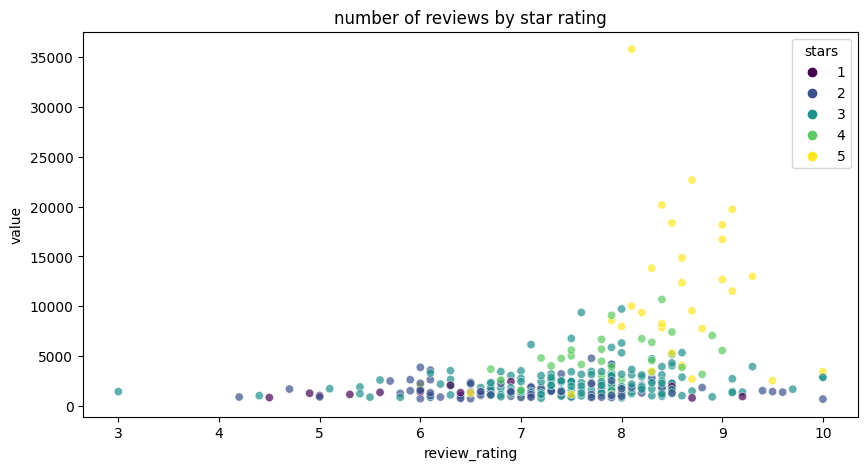

In [11]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data = mean_price, y = 'value', x = 'review_rating', hue = 'stars', palette = 'viridis',  alpha = 0.7)
ax.set(title = 'number of reviews by star rating')

### price and facilities 

In [12]:
## get number of facilities

In [14]:
data['unlist'] = data['all_facilities'].apply(lambda x: [item.lower() for items in x for item in items])
data['faci_count'] = data['unlist'].apply(lambda x: len(Counter(x).keys()))
faci_data = data[['hotel_name_', 'faci_count']]
faci_data = mean_price.merge(faci_data)
faci_data

,hotel_name_,value,stars,review_rating,total_reviews,faci_count
0,88 Courtyard Hotel,2431.250000,3,7.5,173,54
1,ACL Suites,3863.000000,2,6.0,13,38
2,Achievers Airport Hotel,3200.000000,2,7.4,709,64
3,Admiral Hotel Manila - MGallery,11518.888889,5,9.1,20,110
4,Airo Hotel Manila,2328.750000,3,7.6,201,25
...,...,...,...,...,...,...
302,airobedz MAKATI - near Cash & Carry Mall,1619.000000,3,8.5,691,29
303,airobedz MANILA - near Taft Avenue,963.000000,2,8.0,223,37
304,airobedz MCKINLEY - near SM Aura,1290.000000,2,8.5,372,23
305,iHotel Uptown BGC,2181.200000,3,8.1,401,27


[Text(0.5, 1.0, 'price by number of facilities')]

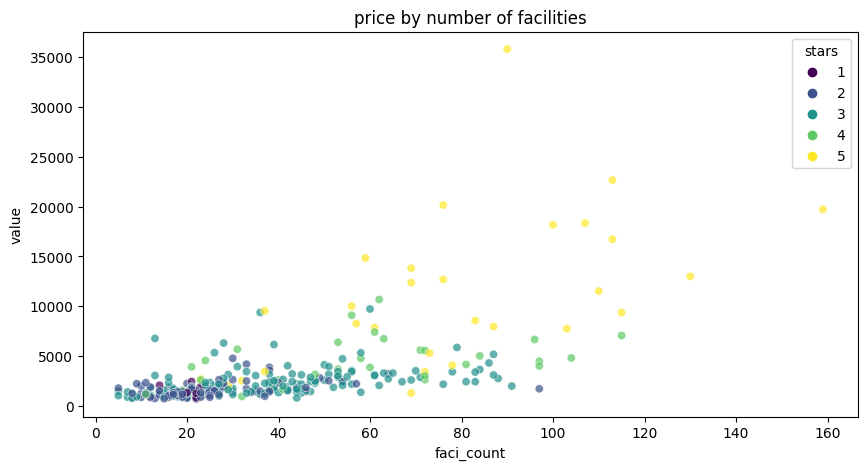

In [17]:
plt.figure(figsize=(10,5))
ax = sns.scatterplot(data = faci_data, y = 'value', x = 'faci_count', hue = 'stars', palette = 'viridis',  alpha = 0.7)
ax.set(title = 'price by number of facilities')

C:\Users\Karen\AppData\Local\Temp\ipykernel_496\3030691810.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(data = data, x = 'faci_count',  kde = True, palette = 'viridis')


[Text(0.5, 1.0, 'distribution of facilities count')]

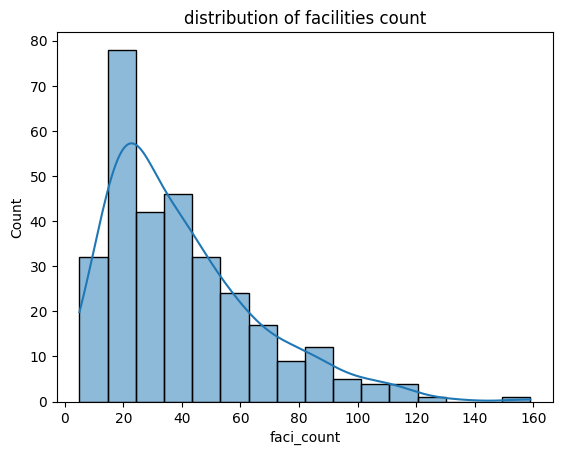

In [18]:
ax = sns.histplot(data = data, x = 'faci_count',  kde = True, palette = 'viridis')
ax.set(title = 'distribution of facilities count')

In [23]:
bins = [0, 20, 40, 60, 80, 100, np.Inf]
faci_data['faci_bins'] = pd.cut(faci_data['faci_count'], bins)
faci_data

,hotel_name_,value,stars,review_rating,total_reviews,faci_count,faci_bins
0,88 Courtyard Hotel,2431.250000,3,7.5,173,54,"(40.0, 60.0]"
1,ACL Suites,3863.000000,2,6.0,13,38,"(20.0, 40.0]"
2,Achievers Airport Hotel,3200.000000,2,7.4,709,64,"(60.0, 80.0]"
3,Admiral Hotel Manila - MGallery,11518.888889,5,9.1,20,110,"(100.0, inf]"
4,Airo Hotel Manila,2328.750000,3,7.6,201,25,"(20.0, 40.0]"
...,...,...,...,...,...,...,...
302,airobedz MAKATI - near Cash & Carry Mall,1619.000000,3,8.5,691,29,"(20.0, 40.0]"
303,airobedz MANILA - near Taft Avenue,963.000000,2,8.0,223,37,"(20.0, 40.0]"
304,airobedz MCKINLEY - near SM Aura,1290.000000,2,8.5,372,23,"(20.0, 40.0]"
305,iHotel Uptown BGC,2181.200000,3,8.1,401,27,"(20.0, 40.0]"


[Text(0.5, 1.0, 'distribution of room price by number of facilities \n(average room price)')]

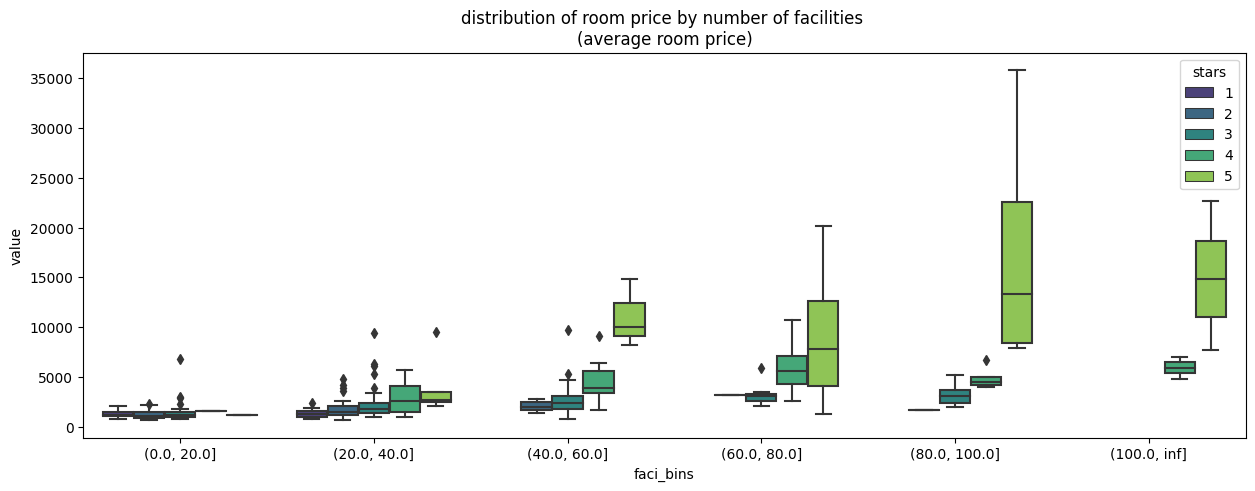

In [29]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data = faci_data, x = 'faci_bins', y = 'value', hue = 'stars', palette='viridis')
ax.set(title = 'distribution of room price by number of facilities \n(average room price)')